In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(14, 10))
sns.set_style("whitegrid")

colors = {
    'bg': '#EFE8E8',
    'text': '#513838',
    
    'red': '#DC3545',
    'blue': "#4476C2",
    'cyan': '#0AA2C0',
    'green': '#1AA179',
    'purple': '#7121F3',
    'orange': '#FD7E14',
    'yellow': '#FFC107',
    'pink': '#D63384',
    'white_green': "#64B099"
}

custom_palette = [
    colors['blue'], colors['red'], colors['green'], 
    colors['orange'], colors['purple'], colors['cyan']
]

custom_params = {
    "figure.facecolor": colors['bg'],
    "axes.facecolor": colors['bg'],
    "savefig.facecolor": colors['bg'],
    
    "text.color": colors['text'],
    "axes.labelcolor": colors['text'],
    "xtick.color": colors['text'],
    "ytick.color": colors['text'],
    "font.family": "sans-serif",
    
    "axes.grid": True,
    "grid.color": colors['text'],
    "grid.alpha": 0.15,
    "grid.linestyle": "-",
    "grid.linewidth": 0.8,
    
    "axes.spines.left": True,
    "axes.spines.bottom": True,
    "axes.spines.right": False,
    "axes.spines.top": False,
    "axes.edgecolor": colors['text'],
    "axes.linewidth": 0.8,
    
    "lines.linewidth": 1.5,
    "lines.markersize": 6,
}

sns.set_theme(
    context="talk",
    style="whitegrid",
    rc=custom_params,
    palette=custom_palette
)

df = pd.read_csv('dfc.csv')
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,...,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score,review_time,is_profitable
0,2025-02-17 12:14:00,2025-02-17 14:58:26.542,060308edb7cfda819b61a123511148f0,Банк,без оценки (негативный),0,banki.ru,депозитные продукты,дебетовая карта,Не определено,...,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,2.0,2.740706,False
1,2025-04-06 08:40:00,2025-04-06 13:34:05.302,73fe1fda01a23a7742ad77310f1f0db3,Банк,1,0,banki.ru,кредит наличными под залог,кредит наличными под залог недвижимости,Не определено,...,NaN,РФ,Доходные,0.0,0.0,0.0,Не определен,NaN,4.901473,True
2,2025-09-14 22:44:00,2025-09-15 16:45:38.860,1c75c430852fa282f403a0e22d12216d,Банк,без оценки (негативный),0,banki.ru,депозитные продукты,дебетовая карта,Не определено,...,0.0,РФ,Доходные,0.0,0.0,1.0,Молодежь,NaN,18.027461,True
3,2025-02-18 09:19:00,2025-02-21 12:55:01.232,3c9958c7c304eec77638d74cb48429e0,Банк,1,0,banki.ru,кредитные карты,кредитная карта,Не определено,...,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN,75.600342,True
4,2025-02-18 22:25:00,2025-02-22 12:11:35.841,fca861d8616c9c61f4de7a840e45103b,Банк,1,0,banki.ru,кредит наличными,кредит наличными,неверная консультация,...,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN,85.776623,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17692,2025-09-19 04:59:59.000,2025-09-19 05:59:17.528,8b6366ec486a9d3cd1f24bd5aed357de,Банк,1,0,banki.ru,депозитные продукты,дебетовая карта,Не определено,...,0.0,РФ,Малодоходные,0.0,0.0,0.0,Подростки,NaN,0.988480,False
17693,2025-03-16 09:40:00.000,2025-03-17 14:32:19.606,01299240dbf3e6a58a9e3fdee7a4e70b,Банк,без оценки (негативный),0,banki.ru,кредит на покупку,кредит на покупку,Не определено,...,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN,28.872113,False
17694,2025-08-28 11:06:00.000,2025-08-28 13:40:22.955,aefb3c98b1a22ed9f76c72f2f1168948,Банк,без оценки (негативный),0,banki.ru,депозитные продукты,дебетовая карта,Не определено,...,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN,2.573043,True
17695,2025-05-26 15:35:55.000,2025-05-26 16:53:07.851,2a0a1379b18c7b641b3670920f642057,Банк,1,0,banki.ru,депозитные продукты,дебетовая карта,Не определено,...,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN,1.286903,True


<Figure size 1400x1000 with 0 Axes>

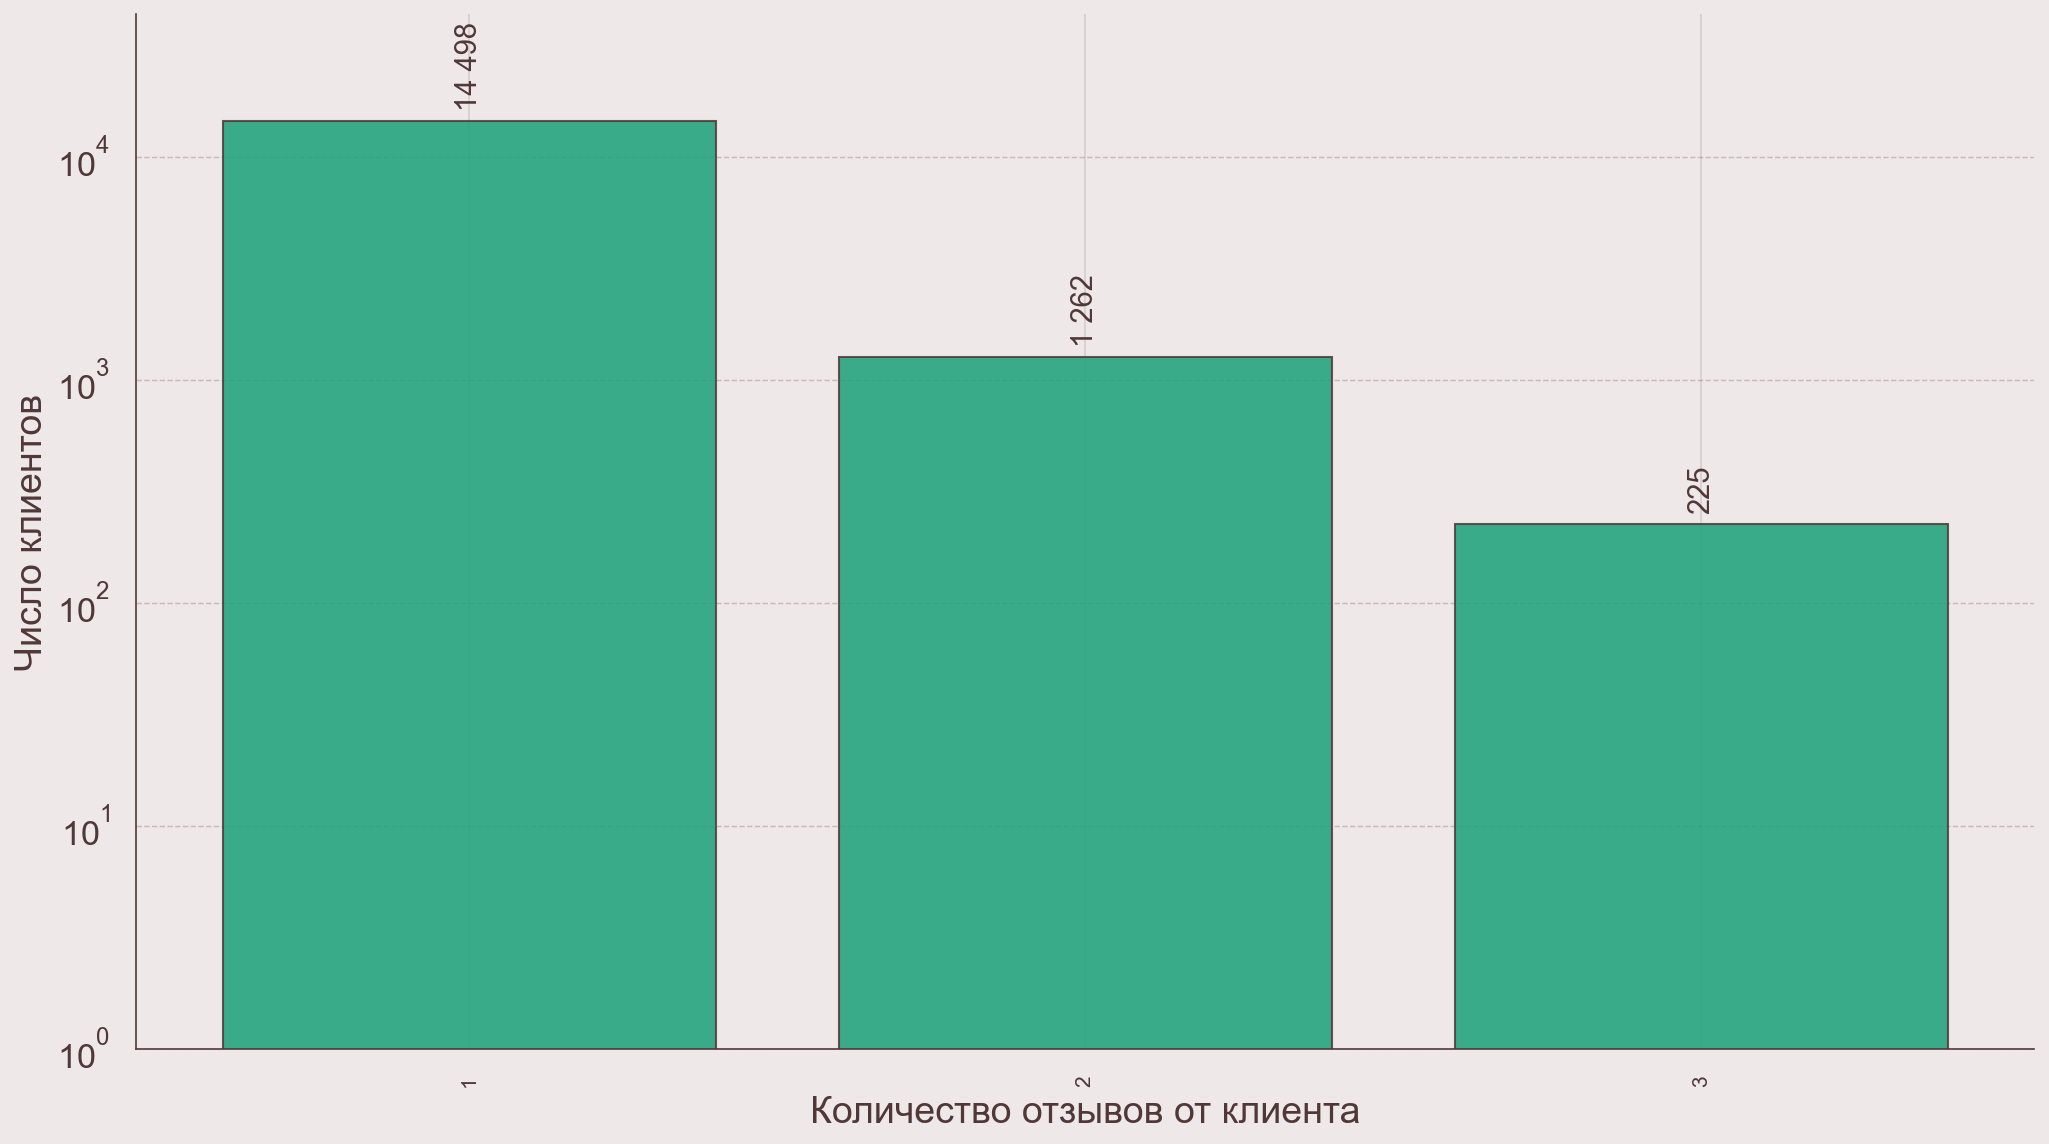

In [39]:
reviews_per_client = df.groupby('id_client').size()
dist = reviews_per_client.value_counts().sort_index()

x = dist.index.to_numpy()
y = dist.to_numpy()

fig, ax = plt.subplots(figsize=(14, 8), dpi=150)

bars = ax.bar(
    x, y,
    color=colors['green'],
    alpha=0.85,
    edgecolor=colors['text'],
    linewidth=1.0
)

ax.set_xlabel("Количество отзывов от клиента")
ax.set_ylabel("Число клиентов")

ax.set_xticks(x)
ax.set_xticklabels([str(v) for v in x], rotation=90, fontsize=10)

ax.set_yscale("log")

labels = [f"{int(v):,}".replace(",", " ") for v in y]
ax.bar_label(
    bars,
    labels=labels,
    padding=5,
    fontsize=14,
    fontweight="regular",
    color=colors["text"],
    rotation=90
)

y_max = int(y.max()) if len(y) else 1
ax.set_ylim(bottom=1, top=max(2, y_max * 3))

ax.grid(True, axis="y", alpha=0.25, linestyle="--", linewidth=0.7)
ax.set_axisbelow(True)
sns.despine(ax=ax, right=True, top=True)

plt.tight_layout()
plt.show()

In [40]:
children = df[df['age_segment'] == 'Дети']
children['influencer_flg'].value_counts()

influencer_flg
0.0    11
Name: count, dtype: int64